<a href="https://colab.research.google.com/github/camulro/Aprendizaje-I-new/blob/main/04_kmeans_wines_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="figuras/mbit-logo.png" align="right" style="float" width="200">
<font color="#CA3532"><h1 align="left">Clustering</h1></font>
<h2 align="left">Wines dataset</h2>

In [1]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Load

Now we will use clustering in a wine database. The goal is to check if the clustering discovers the different real wine types.

The database describes the parameters of different wine instances. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [3]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1ilWuZRZFyUk9r2Z22Cl7vsv6T8Gz2Kr5',
                                        dest_path="./datasets/wine_dataset.csv")
    gdd.download_file_from_google_drive(file_id='1XRtjz0L2oiAmKupnxIclUkwiBgahYcEs',
                                        dest_path="./libreria_aux_arboles.py")
    gdd.download_file_from_google_drive(file_id='1TTg21AIw2HzrBaN0B02bG-SX09eCn79e',
                                        dest_path="./my_library.py")

data = pd.read_csv('datasets/wine_dataset.csv', delimiter=';', header=0)

abro_negrita = '\033[1m'
cierro_negrita = '\033[0m'
print(abro_negrita + 'Wine Database\n' + cierro_negrita )
print('Number of real classes (wine types): %d' % np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst 5 instances:\n')
data.head(3)

Wine Database

Number of real classes (wine types): 3
Unique class labels: ['A' 'B' 'C']

First 5 instances:



,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


## Data Description

In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Hay datos con varianza muy grande, hay que estandarizar y además, haremos PCA porque ahora tenemos muchas variables.

In [6]:
data.isnull().sum().sum()

0

## Data Exploration

In [5]:
class_column = 'Type'
classes_names = data['Type'].unique()
attribute_columns = list(data.columns)
attribute_columns.remove(class_column)

print(class_column)
print(classes_names)
print(attribute_columns)

Type
['A' 'B' 'C']
['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']


After loading the database we need to do some basic preprocessing: standarization and PCA:

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

attribute_columns = list(data.columns.values)
attribute_columns.remove('Type')

print(attribute_columns)

X = data[attribute_columns]
y = data["Type"]

['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']


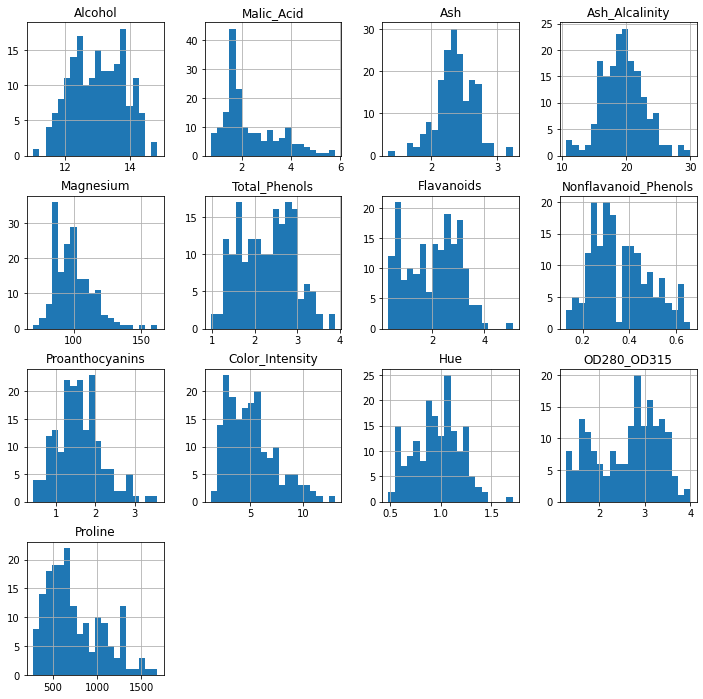

In [8]:
data.hist(bins=20, figsize=(12,12), layout=(-1,4));

# Clustering with k-means

In [9]:
clean_data = data[attribute_columns].copy()
attributes_names = attribute_columns

y = np.array(data[class_column])
X = np.array(clean_data[attribute_columns])

Basic preprocessing: standarization and PCA.
Cuantas más dimensiones (variables) metas es mucho más dificil ver la estructura de los datos. PCA comprime las variables, le va a ayudar al algoritmo de clustering a detectar la estructura.

In [10]:
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=5).fit_transform(X_std)

pd.DataFrame(X_pca).describe()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)


,0,1,2,3,4
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-7.983626e-17,-4.989766e-17,3.368092e-17,-2.370139e-17,3.118604e-18
std,2.175417e+00,1.584639e+00,1.205920e+00,9.613355e-01,9.263092e-01
min,-4.280639e+00,-3.515090e+00,-4.585064e+00,-2.890120e+00,-2.023127e+00
25%,-2.172762e+00,-1.233675e+00,-8.311875e-01,-6.860538e-01,-5.734337e-01
50%,6.051146e-02,-2.620302e-01,-1.416121e-01,-2.579312e-02,-2.658996e-01
75%,2.001293e+00,1.398300e+00,7.600610e-01,5.871144e-01,3.550493e-01
max,4.312784e+00,3.871784e+00,5.345388e+00,3.790335e+00,4.186657e+00


Now we perform k-means searching the optimal number of clusters according to the Calinski-Harabasz score:

In [11]:
#from sklearn.metrics import silhouette_score as qmetric
from sklearn.metrics import calinski_harabasz_score as qmetric
from sklearn.cluster import KMeans

X_km = X_pca
#X_km = X_std

Nclusters_max = 15
Nrepetitions = 10

qualities = []
inertias = []
models = []
for k in range(1,Nclusters_max+1):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++', n_init=Nrepetitions,
                    max_iter=500, random_state=2)    
    kmeans.fit(X_km)
    models.append(kmeans)
    inertias.append(kmeans.inertia_)
    if k >1:
        qualities.append(qmetric(X_km, kmeans.labels_))
    else:
        qualities.append(0)

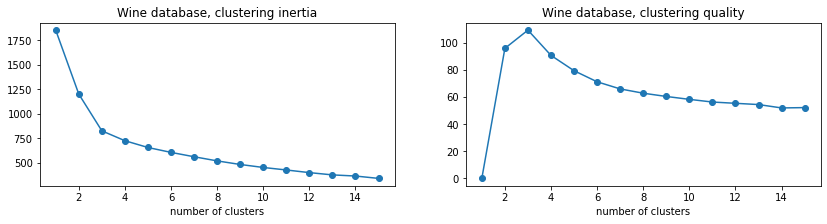

In [12]:
fig = plt.figure(figsize=(14,3))

ax = plt.subplot(1,2,1)
plt.plot(range(1,Nclusters_max+1), inertias, marker='o')
plt.xlabel('number of clusters')
plt.title('Wine database, clustering inertia')

ax = plt.subplot(1,2,2)
plt.plot(range(1,Nclusters_max+1), qualities, marker='o')
plt.xlabel('number of clusters')
plt.title('Wine database, clustering quality')
plt.show()

best = pd.Series(qualities).idxmax() # get index for the best model
kmeans = models[best]
n_clusters = kmeans.get_params()['n_clusters']

Ha detectado que hay tres tipos de vinos.

In [ ]:
data.shape

(178, 14)

In [13]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02]])

In [14]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [15]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

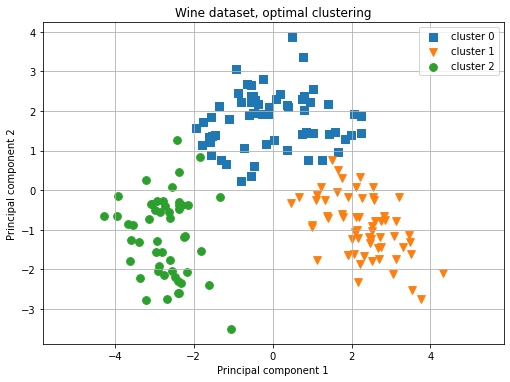

Optimal number of clusters: 3 

- Cluster 0
  36.5169% of total patterns
  Number of patterns with real class A: 0
  Number of patterns with real class B: 65
  Number of patterns with real class C: 0

- Cluster 1
  34.8315% of total patterns
  Number of patterns with real class A: 59
  Number of patterns with real class B: 3
  Number of patterns with real class C: 0

- Cluster 2
  28.6517% of total patterns
  Number of patterns with real class A: 0
  Number of patterns with real class B: 3
  Number of patterns with real class C: 48



In [16]:
pcs = [0,1]

cluster_names = ["cluster "+str(c) for c in range(n_clusters)]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for i in range(n_clusters):
    inds = np.where(kmeans.labels_ == i)[0]
    plt.scatter(X_pca[inds, pcs[0]],
                X_pca[inds, pcs[1]],
                s = 60,
                c = colors[i],
                marker = markers[i],
                alpha = 1.0,
                cmap='RdYlGn',
                label = cluster_names[i])

plt.legend(); plt.grid(); plt.axis('equal'); plt.tight_layout()
plt.title('Wine dataset, optimal clustering')
plt.xlabel('Principal component '+str(pcs[0]+1))
plt.ylabel('Principal component '+str(pcs[1]+1))
plt.show()

print('Optimal number of clusters:', n_clusters, '\n')

unique_y = np.unique(y)
ids_clusters = kmeans.labels_
for i in np.unique(ids_clusters):
    inds = (np.where(np.array(ids_clusters) == i))[0]
    print('\033[1m'+'- Cluster %d' % i + '\033[0m')
    print('  %g%% of total patterns' % (100*len(inds)/len(ids_clusters)))
    for real_class in unique_y:
        print('  Number of patterns with real class %c: %d' % (real_class, (list(y[inds])).count(real_class)))
    print()

Hay trucos para interpretar cuál es el significado de esos clusters, qué tienen en común los datos que pertencen a un cluster.

In [ ]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02]])

In [17]:
df = pd.DataFrame(data=np.hstack((X,np.reshape(ids_clusters, (len(ids_clusters),1)))),
                  columns=attribute_columns+['cluster_id'])
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline,cluster_id
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,1.0
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,1.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,1.0


## Interpretation of the obtained clusters

In [18]:
df.groupby('cluster_id').mean() #promedio de las variables originales en cada uno de los tres clusters

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
cluster_id,,,,,,,,,,,,,
0.0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1.0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2.0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [19]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02]])

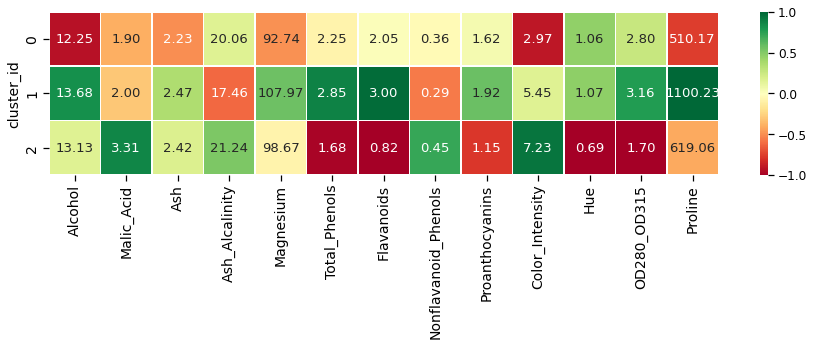

In [20]:
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,n_clusters))
aux = pd.DataFrame(data=np.hstack((X,np.reshape(ids_clusters, (len(ids_clusters),1)))),
                   columns=attribute_columns+['cluster_id'])
df_aux = pd.DataFrame(data=np.hstack((X_std,np.reshape(ids_clusters, (len(ids_clusters),1)))),
                      columns=attribute_columns+['cluster_id'])
aa = sns.heatmap(df_aux.groupby('cluster_id').mean(),
                 annot = aux.groupby('cluster_id').mean(),
                 vmin=-1, vmax=1,
                 cmap='RdYlGn',
                 linewidths=.5, fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(np.array(range(n_clusters))+0.5,range(n_clusters),fontsize=14)
plt.ylabel('cluster_id', fontsize=14);

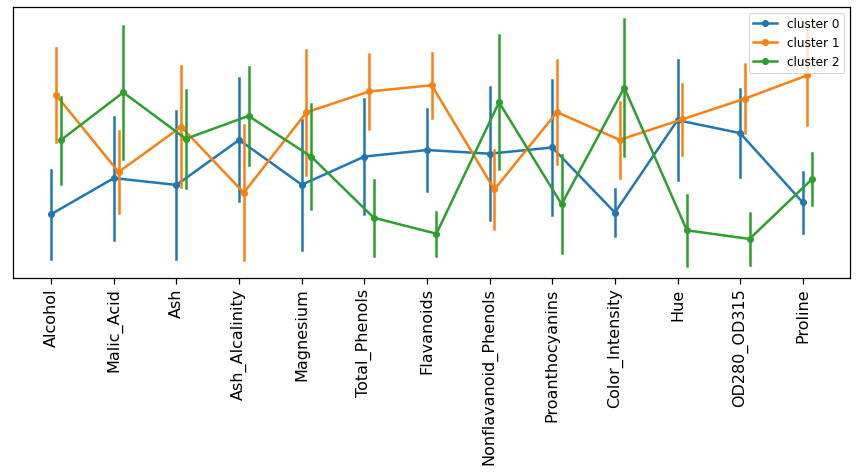

In [21]:
mean_aux = df_aux.groupby('cluster_id').mean().values.T
std_aux  = df_aux.groupby('cluster_id').std().values.T

plt.figure(figsize=(15,5))
for c in range(n_clusters):
    plot_shift = .15/(n_clusters-1)*c
    plt.plot(np.arange(mean_aux.shape[0])+plot_shift,
             mean_aux[:,c], '-o',
             color=colors[c], label=cluster_names[c])
    for i in range(mean_aux.shape[0]):
        plt.plot(2*[i+plot_shift], mean_aux[i,c]+[-std_aux[i,c], std_aux[i,c]],
                 color=colors[c])
plt.xticks(range(mean_aux.shape[0]), attributes_names,
           rotation=90, fontsize=16)
plt.legend(fontsize=12)
plt.yticks([]);

## Interpretation of the clusters using a decision tree

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from libreria_aux_arboles import tree_to_code, tree_to_pseudo

if COLAB:
    from graphviz import Source

startbold = '\033[1m'
endbold = '\033[0m'

def tree(Alcohol, Malic_Acid, Ash, Ash_Alcalinity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280_OD315, Proline):
  if Proline <= 755.0:
    if OD280_OD315 <= 2.190000057220459:
      return [[ 5.  0. 44.]]
    else:  # if OD280_OD315 > 2.190000057220459
      return [[58.  3.  1.]]
  else:  # if Proline > 755.0
    return [[ 2. 59.  6.]]


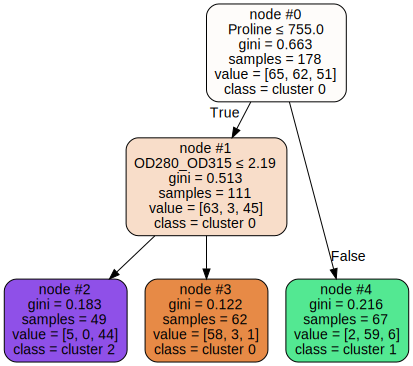

In [23]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=0.2)

clf = clf.fit(X, ids_clusters)

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

if COLAB:
    display(Source(export_graphviz(clf, out_file=None,
                                   feature_names=attributes_names,
                                   class_names=cluster_names,
                                   filled=True, rounded=True,
                                   special_characters=True,
                                   impurity=True,
                                   leaves_parallel=True,
                                   rotate=False,
                                   node_ids=True)))

## Obtaining the set of rules equivalent to the tree

In [24]:
from my_library import get_rules_from_tree

rules = get_rules_from_tree(clf, attributes_names, cluster_names, X, ids_clusters)

print(len(rules), "rules:\n")
for item in rules.items():
    print('\033[1m' + "* ", item[1][0], '\033[0m')
    for c in item[1][1]:
        print("     "+c[0]+":", c[1], "cases (%.2f%%)" % (100*c[2]))

3 rules:

*  (Proline <= 755.0000) and (OD280_OD315 <= 2.1900) 
     cluster 0: 5 cases (10.20%)
     cluster 1: 0 cases (0.00%)
     cluster 2: 44 cases (89.80%)
*  (Proline <= 755.0000) and (OD280_OD315 > 2.1900) 
     cluster 0: 58 cases (93.55%)
     cluster 1: 3 cases (4.84%)
     cluster 2: 1 cases (1.61%)
*  (Proline > 755.0000) 
     cluster 0: 2 cases (2.99%)
     cluster 1: 59 cases (88.06%)
     cluster 2: 6 cases (8.96%)
